In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binomtest

In [21]:
# Cargaremos el archivo Excel modificado que el usuario acaba de subir
file_path_excel_modificado = 'dataset_empleados.xlsx'

In [22]:
# Utilizamos Pandas para cargar el archivo Excel modificado
df_empleados_excel_modificado = pd.read_excel(file_path_excel_modificado)

In [23]:
#Intervalo de confianza 1
# Extraemos la columna de horas de trabajo del DataFrame modificado
horas_trabajo_modificado = df_empleados_excel_modificado['Horas_Trabajo']

# Calculamos la media y la desviación estándar de las horas de trabajo
media_horas_modificado = np.mean(horas_trabajo_modificado)
std_horas_modificado = np.std(horas_trabajo_modificado, ddof=1)  # ddof=1 para muestra

# Número de observaciones
n_modificado = len(horas_trabajo_modificado)

# Calculamos el intervalo de confianza del 95% para la media
confianza = 0.95
sem_modificado = std_horas_modificado / np.sqrt(n_modificado)
intervalo_confianza_modificado = stats.norm.interval(confianza, loc=media_horas_modificado, scale=sem_modificado)

print("intervalo de confianza sobre las horas de trabajo",intervalo_confianza_modificado)
print("media muestral", media_horas_modificado)
print("std", std_horas_modificado)
print("n", n_modificado)
print("sem", sem_modificado)

intervalo de confianza sobre las horas de trabajo (42.57585990251015, 44.64862989340822)
media muestral 43.61224489795919
std 3.7014429986302426
n 49
sem 0.5287775712328918


In [24]:
# Asumiendo que 'df_empleados_excel_modificado' ya ha sido definido y contiene los datos filtrados
media_salario_licenciados = np.mean(df_empleados_excel_modificado['Salario'])
std_salario_licenciados = np.std(df_empleados_excel_modificado['Salario'], ddof=1)
n_licenciados = len(df_empleados_excel_modificado)

confianza = 0.95
sem_licenciados = std_salario_licenciados / np.sqrt(n_licenciados)

# Usando 't.interval'
intervalo_confianza_licenciados = stats.t.interval(confianza, df=n_licenciados-1, loc=media_salario_licenciados, scale=sem_licenciados)

print("Intervalo de confianza del 95% para el salario medio de los licenciados:", intervalo_confianza_licenciados)
print("media", media_salario_licenciados)
print("std", std_salario_licenciados)
print("n", n_licenciados)


Intervalo de confianza del 95% para el salario medio de los licenciados: (70786.18193655624, 77948.51194099477)
media 74367.3469387755
std 12467.781608261052
n 49


In [25]:
# Datos proporcionados
media_muestral = 63545.45  # Media de la muestra
desviacion_estandar = 5820.54  # Desviación estándar de la muestra
tamaño_muestra = 22  # Tamaño de la muestra
confianza = 0.95  # Nivel de confianza deseado

# Calcular el error estándar de la media
error_estandar = desviacion_estandar / (tamaño_muestra ** 0.5)

# Encontrar el valor crítico de t
grados_libertad = tamaño_muestra - 1
t_critico = stats.t.ppf((1 + confianza) / 2, grados_libertad)

# Calcular el intervalo de confianza
margen_error = t_critico * error_estandar
ci_lower = media_muestral - margen_error
ci_upper = media_muestral + margen_error

ci_lower, ci_upper
print("lower", ci_lower)
print("upper",ci_upper)
print("media", media_muestral)
print("std", desviacion_estandar)
print("n", tamaño_muestra)

lower 60964.76713783794
upper 66126.13286216205
media 63545.45
std 5820.54
n 22


In [26]:
# Contar el número de mujeres en la muestra
num_mujeres = df_empleados_excel_modificado['Genero'].str.strip().str.lower().value_counts().get('femenino', 0)
total_empleados = len(df_empleados_excel_modificado)

# Proporción observada de mujeres en la muestra
proporcion_mujeres = num_mujeres / total_empleados

# Nueva hipótesis nula
p_h0_nueva = 0.32

# Realizar el test de hipótesis con la nueva hipótesis nula
# Usando 'greater' como alternativa porque H1: p > 0.19
# Realizar el test de hipótesis con la nueva hipótesis nula usando 'binomtest'
resultado_test = binomtest(num_mujeres, total_empleados, p_h0_nueva, alternative='greater')

# Obtener el valor p del resultado
p_value_nueva = resultado_test.pvalue

# Imprimir los resultados
print("Numero de mujeres en la muestra:", num_mujeres)
print("Total de empleados en la muestra:", total_empleados)
print("Proporcion observada de mujeres:", proporcion_mujeres)
print("Valor p del test de hipotesis:", p_value_nueva)

Numero de mujeres en la muestra: 23
Total de empleados en la muestra: 49
Proporcion observada de mujeres: 0.46938775510204084
Valor p del test de hipotesis: 0.020543795543531772


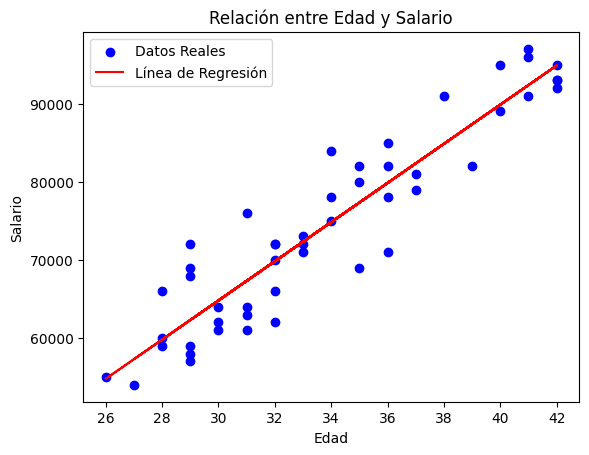

In [27]:
# Preparación de los datos para el modelo de regresión lineal
X = df_empleados_excel_modificado['Edad']  # Variable independiente
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtenemos los valores de la edad y los salarios predichos por el modelo
X_valores = df_empleados_excel_modificado['Edad']
y_pred = modelo.predict()

# Gráfico de dispersión de los datos reales
plt.scatter(X_valores, y, label='Datos Reales', color='blue')

# Línea de tendencia del modelo de regresión
plt.plot(X_valores, y_pred, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()

Coeficiente de correlación de Pearson entre Edad y Salario: 0.930705317724075
Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: 0.9659206584056843


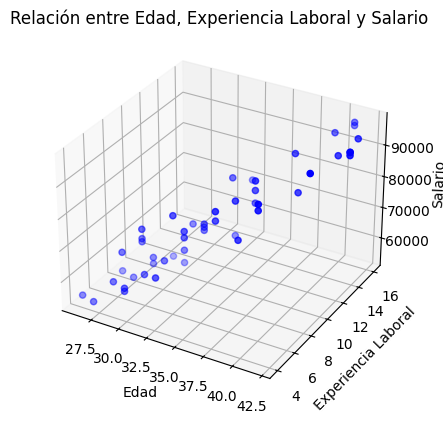

In [28]:
# MODELO REGRESION LINEAL MULTIPLE EDAD, EXPERIENCIA LABORAL / SALARIO 

# Calcular las correlaciones lineales
correlacion_edad_salario = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])
correlacion_experiencia_salario = df_empleados_excel_modificado['Experiencia_Laboral'].corr(df_empleados_excel_modificado['Salario'])

print(f"Coeficiente de correlación de Pearson entre Edad y Salario: {correlacion_edad_salario}")
print(f"Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: {correlacion_experiencia_salario}")

# Gráfico de dispersión 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos para el gráfico
x = df_empleados_excel_modificado['Edad']
y = df_empleados_excel_modificado['Experiencia_Laboral']
z = df_empleados_excel_modificado['Salario']

# Crear el gráfico de dispersión
ax.scatter(x, y, z, color='b')

# Etiquetas y título
ax.set_xlabel('Edad')
ax.set_ylabel('Experiencia Laboral')
ax.set_zlabel('Salario')
ax.set_title('Relación entre Edad, Experiencia Laboral y Salario')

# Mostrar el gráfico
plt.show()

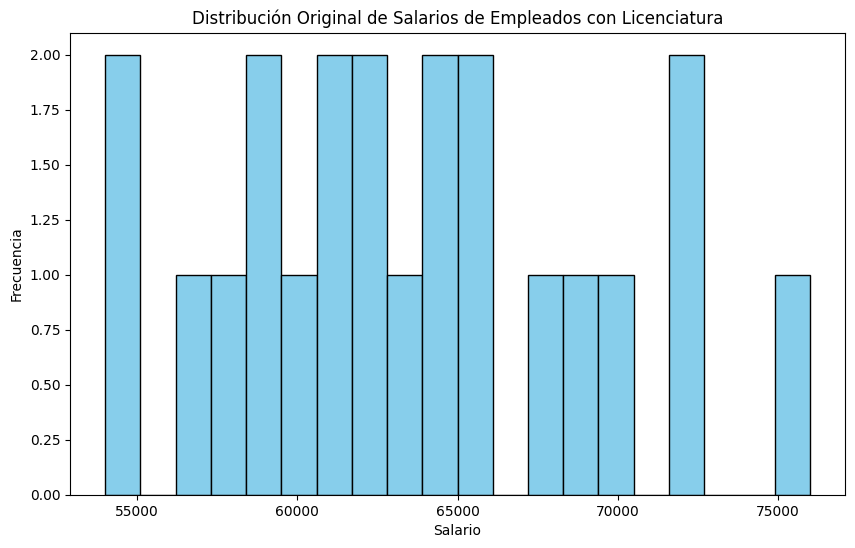

Asimetría original: 0.3910728555975352


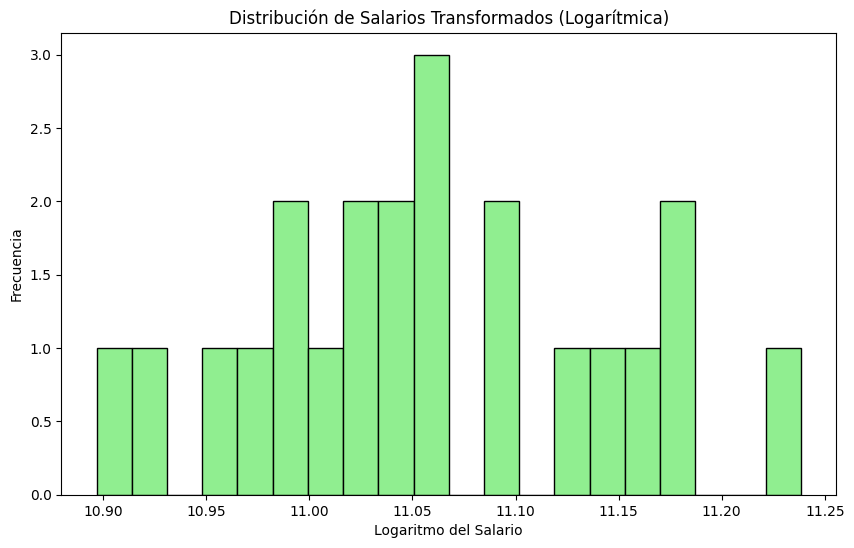

Intervalo de confianza del 95% en la escala original: [60797.78724778 65894.14517338]


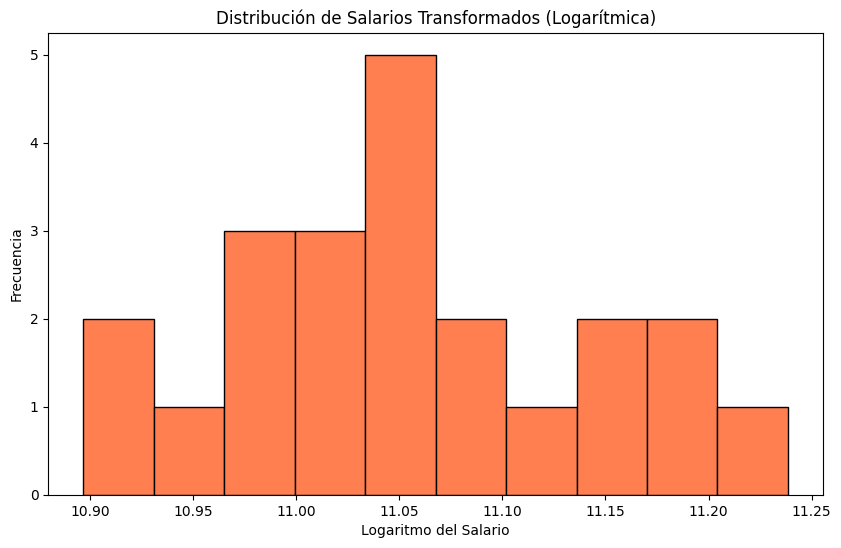

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cargar los datos desde un archivo Excel
file_path_excel = 'dataset_empleados.xlsx'  # Reemplaza con la ruta de tu archivo Excel
data_excel = pd.read_excel(file_path_excel)

# Filtrar por empleados con nivel de educación 'Licenciatura'
licenciados = data_excel[data_excel['Nivel_Educacion'] == 'Licenciatura']

# Visualizar la distribución original de los salarios
plt.figure(figsize=(10, 6))
plt.hist(licenciados['Salario'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución Original de Salarios de Empleados con Licenciatura')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

# Calcular y mostrar la asimetría de los salarios
skewness = licenciados['Salario'].skew()
print(f'Asimetría original: {skewness}')

# Aplicar la transformación logarítmica
salarios_transformados = np.log(licenciados['Salario'])

# Visualizar la distribución de los salarios transformados
plt.figure(figsize=(10, 6))
plt.hist(salarios_transformados, bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución de Salarios Transformados (Logarítmica)')
plt.xlabel('Logaritmo del Salario')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la media y la desviación estándar de los salarios transformados
media_transformada = salarios_transformados.mean()
std_transformada = salarios_transformados.std()

# Tamaño de la muestra y grados de libertad
n = len(licenciados)
grados_libertad = n - 1

# Calcular el intervalo de confianza del 95% para la media transformada
confianza = 0.95
intervalo_confianza_transformado = stats.t.interval(confianza, grados_libertad, loc=media_transformada, scale=std_transformada / np.sqrt(n))

# Transformar el intervalo de confianza a la escala original
intervalo_confianza_original = np.exp(intervalo_confianza_transformado)
print(f'Intervalo de confianza del 95% en la escala original: {intervalo_confianza_original}')

# Ajustar los bins de la distribución de los salarios transformados
n_bins_transformados = 10
plt.figure(figsize=(10, 6))
plt.hist(salarios_transformados, bins=n_bins_transformados, edgecolor='black', color='coral')
plt.title('Distribución de Salarios Transformados (Logarítmica)')
plt.xlabel('Logaritmo del Salario')
plt.ylabel('Frecuencia')
plt.show()


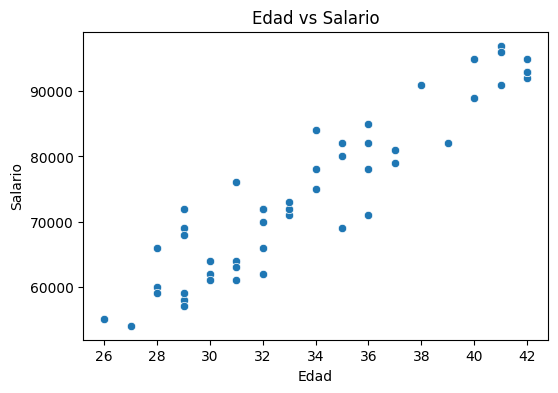

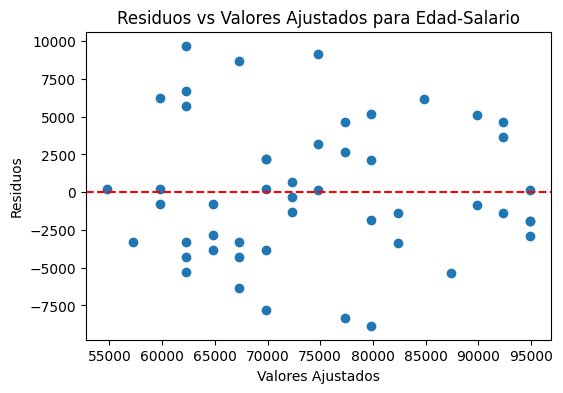

<Figure size 600x400 with 0 Axes>

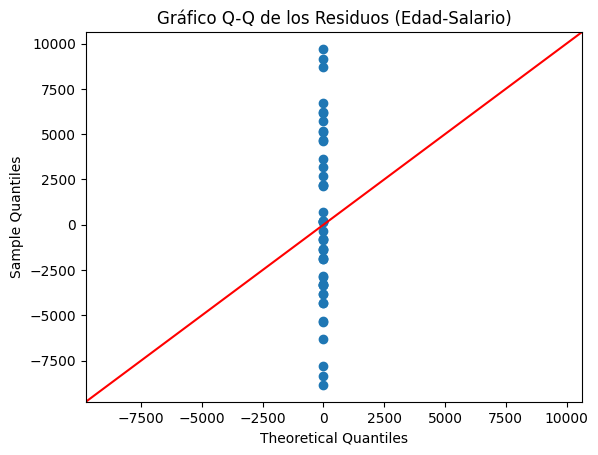

2.7537066710305353

In [30]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Preparando los datos para la regresión lineal solo con 'Edad' y 'Salario'
X_age_salary = data_excel[['Edad']]
y_salary = data_excel['Salario']

# Añadir una constante a la variable independiente 'Edad'
X_age_salary = sm.add_constant(X_age_salary)

# Crear el modelo de regresión lineal solo con 'Edad' y 'Salario'
model_age_salary = sm.OLS(y_salary, X_age_salary).fit()

# Calcular los residuos para este modelo
residuals_age_salary = model_age_salary.resid

# 1. Verificar la linealidad
# Gráfico de dispersión de 'Edad' vs 'Salario'
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data_excel['Edad'], y=data_excel['Salario'])
plt.title('Edad vs Salario')
plt.show()

# 2. Independencia de los errores (Prueba de Durbin-Watson para este modelo)
dw_test_age_salary = durbin_watson(residuals_age_salary)

# 3. Homocedasticidad
# Gráfico de residuos vs valores ajustados para este modelo
plt.figure(figsize=(6, 4))
plt.scatter(model_age_salary.fittedvalues, residuals_age_salary)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados para Edad-Salario')
plt.show()

# 4. Normalidad de los errores
# Gráfico Q-Q para los residuos de este modelo
plt.figure(figsize=(6, 4))
sm.qqplot(residuals_age_salary, line ='45')
plt.title('Gráfico Q-Q de los Residuos (Edad-Salario)')
plt.show()

# Resultados
model_summary_age_salary = model_age_salary.summary()
dw_test_age_salary